In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

from utils import modeling 
from utils import analysis_pipeline
from utils import modeling_long_term

In [39]:
dict = {'trial_num':1,
            'delay_s': 3,
            'encoding': 3,
            'set_size': 5,
            'rxn_time': 4,
            'trial_length': 5,
            'stim': [1,2,3,4],
            'mean': 3,
            'cue': 2,
            'sample': 1,
            'trial_type': 'train',
            'cumulative_delay': 0,
            'cumulative_encoding':0,
            }

df_test = pd.DataFrame([dict])
modeling_long_term.run_train_trial(df_test,0.4)

,trial_num,delay_s,encoding,set_size,rxn_time,trial_length,stim,mean,cue,sample,trial_type,cumulative_delay,cumulative_encoding
0,1,3.0,3.0,5,4.000000,5.000000,"[1, 2, 3, 4]",3.000000,2,1.000000,train,0,0
1,2,3.0,2.0,5,0.671048,5.671048,"[1, 2, 3, 4]",1.870497,0,1.897686,train,5,0


In [40]:
#print(modeling_long_term.create_ltm_block(10,0.4))

In [41]:
df = modeling_long_term.create_df(blocks=10,std=0.4,trials=100)
df_random = modeling.run_model_random(df=df,threshold=0.1,std_decision=0.001)
df_confused = modeling.run_model_confused(df=df,threshold=0.1,std_decision=0.001)

In [42]:
df_random = modeling.model_analysis(df_random)
df_confused = modeling.model_analysis(df_confused)

In [43]:
df_confused[['decision', 'stim', 'cue']].head(5)

,decision,stim,cue
0,0.200043,"[0.9, 0.2, 0.8, 0.4]",1
1,0.799839,"[0.9, 0.2, 0.8, 0.4]",2
2,0.800077,"[0.9, 0.2, 0.8, 0.4]",2
3,0.398947,"[0.9, 0.2, 0.8, 0.4]",3
4,0.900975,"[0.9, 0.2, 0.8, 0.4]",0


747
104
104


Text(0.5, 1.0, 'Set Size Effect on Accuracy')

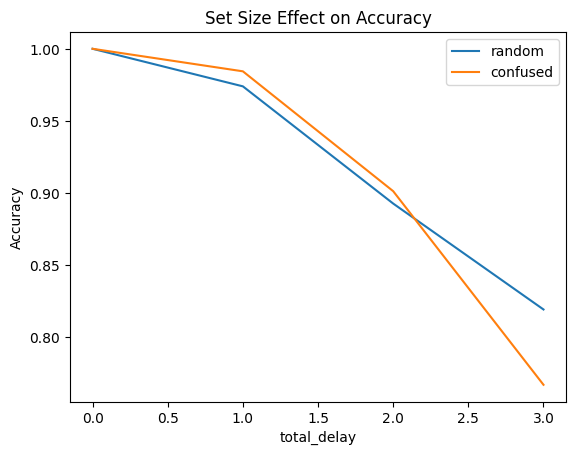

In [44]:
test_df_random = df_random[df_random['trial_type'] == 'test']
test_df_confused = df_confused[df_confused['trial_type'] == 'test']
print(len(test_df_random))
print(test_df_confused.guessing.sum())
print(test_df_random.guessing.sum())
fig,ax = plt.subplots()
ax.plot(test_df_random.groupby('cumulative_delay_bins').correct.mean(), label= 'random')
ax.plot(test_df_confused.groupby('cumulative_delay_bins').correct.mean(),label= 'confused')
plt.legend()
plt.xlabel('total_delay')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on Accuracy')

Text(0.5, 1.0, 'Set Size Effect on Accuracy')

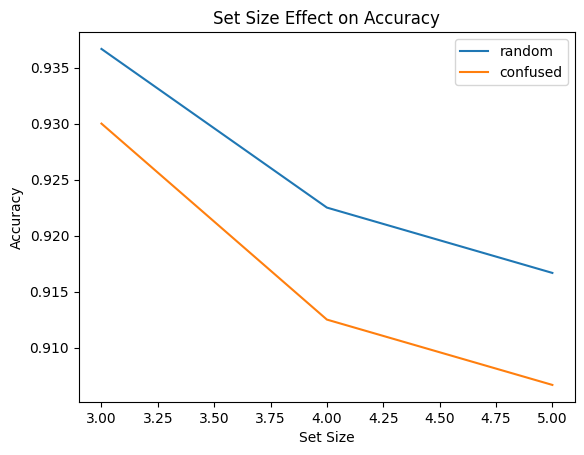

In [45]:
fig,ax = plt.subplots()
ax.plot(df_random.groupby('set_size').correct.mean(), label= 'random')
ax.plot(df_confused.groupby('set_size').correct.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on Accuracy')

Text(0.5, 1.0, 'Set Size Effect on Error')

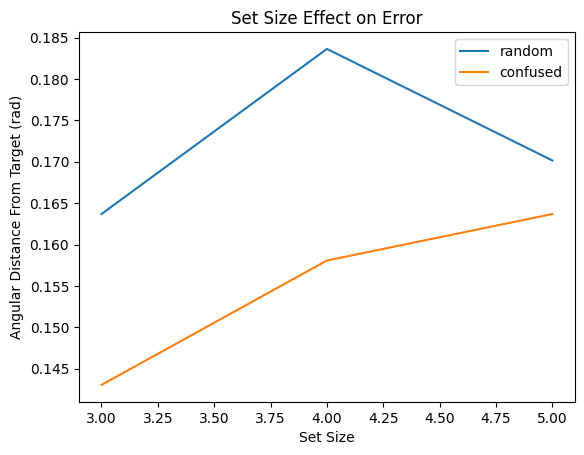

In [46]:
fig,ax = plt.subplots()
ax.plot(df_random.groupby('set_size').precision_difference_0_abs.mean(), label= 'random')
ax.plot(df_confused.groupby('set_size').precision_difference_0_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Distance From Target (rad)')
plt.title('Set Size Effect on Error')

Text(0.5, 1.0, 'Difference in Angular Error from Incorrect Choice (Incorrect Trials)')

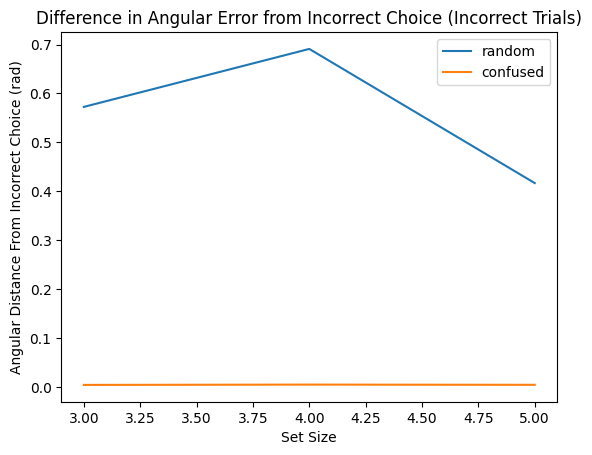

In [47]:
incorrect_df_random = df_random[df_random['correct'] == 0]
incorrect_df_confused = df_confused[df_confused['correct'] == 0]
fig,ax = plt.subplots()
ax.plot(incorrect_df_random.groupby('set_size').precision_difference_choice_abs.mean(), label= 'random')
ax.plot(incorrect_df_confused.groupby('set_size').precision_difference_choice_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Angular Error from Incorrect Choice (Incorrect Trials)')

In [48]:
correct_df_confused = df_confused[df_confused['correct'] == 1]
correct_df_random = df_random[df_random['correct'] == 1]

Text(0.5, 1.0, 'Difference in Guessing Models (Correct Trials)')

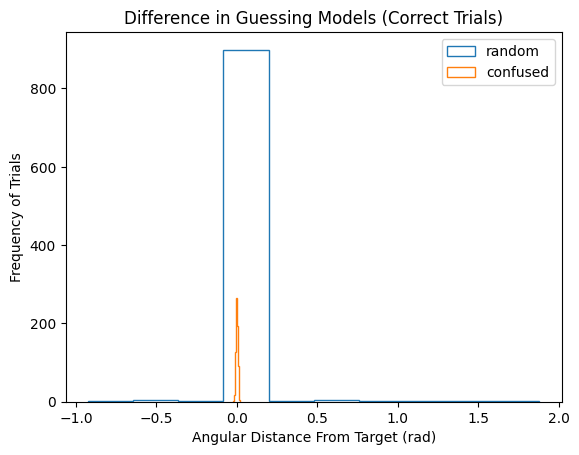

In [49]:
fig,ax = plt.subplots()
ax.hist(correct_df_random.precision_difference_0, label= 'random', histtype = 'step')
ax.hist(correct_df_confused.precision_difference_0,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Guessing Models (Correct Trials)')

<Axes: title={'center': 'Set Size Effect on Precision for Incorrect Choice'}, xlabel='Set Size', ylabel='Angular Distance from Incorrect Choice (rad)'>

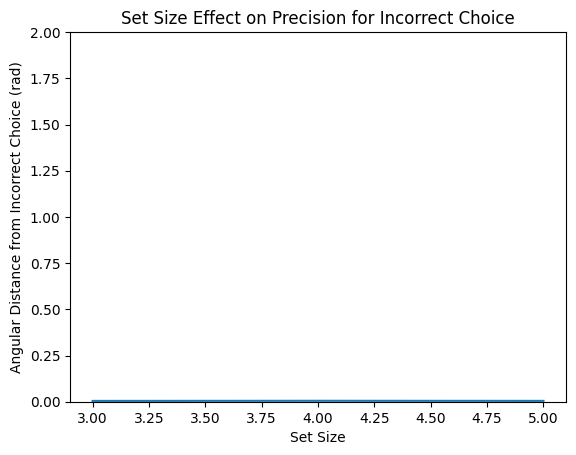

In [50]:
incorrect_df_confused = df_confused[df_confused['correct'] == 0]
incorrect_df_confused.groupby('set_size').precision_difference_choice_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Set Size Effect on Precision for Incorrect Choice',ylim=[0,2])

<Axes: title={'center': 'Set Size Effect on Precision for Incorrect Choice'}, xlabel='Set Size', ylabel='Angular Distance from Incorrect Choice (rad)'>

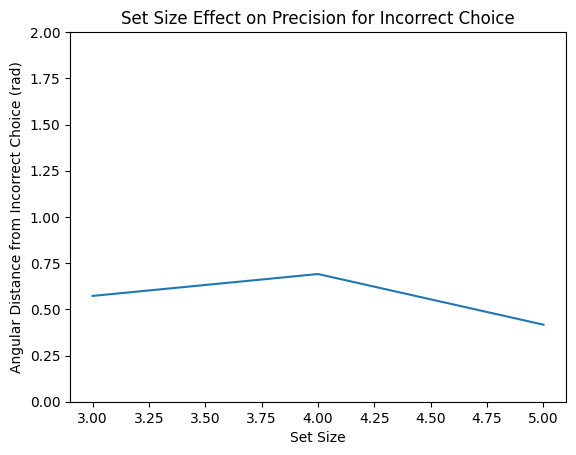

In [51]:
incorrect_df_random = df_random[df_random['correct'] == 0]
incorrect_df_random.groupby('set_size').precision_difference_choice_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Set Size Effect on Precision for Incorrect Choice',ylim=[0,2])

Text(0.5, 1.0, 'Difference in Angular Error from Target (Incorrect Trials)')

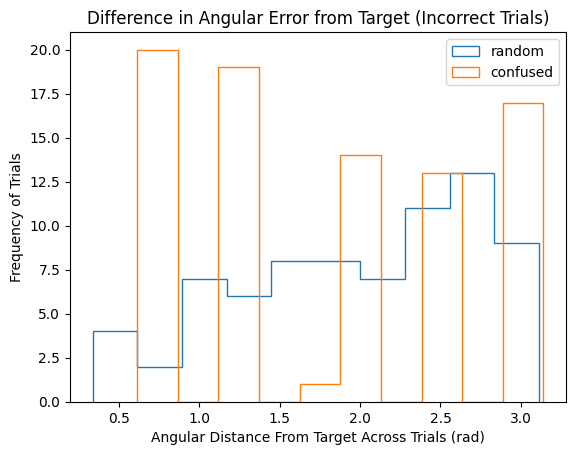

In [52]:
fig,ax = plt.subplots()
ax.hist(incorrect_df_random.precision_difference_0_abs, label= 'random', histtype = 'step')
ax.hist(incorrect_df_confused.precision_difference_0_abs,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (Incorrect Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Choice (All Trials)')

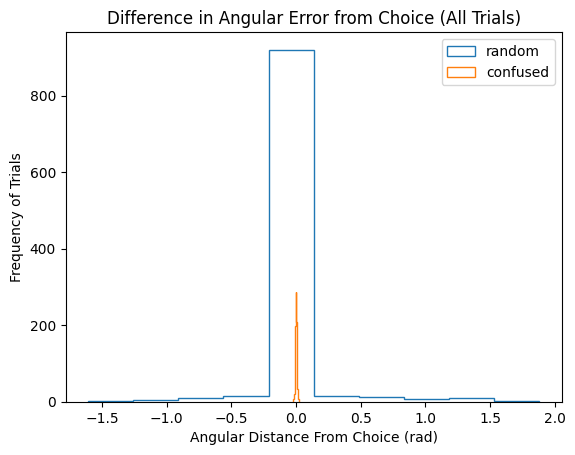

In [53]:
fig,ax = plt.subplots()
ax.hist(df_random.precision_difference_choice, label= 'random', histtype = 'step')
ax.hist(df_confused.precision_difference_choice,label= 'confused', histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Choice (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Choice (All Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Choice (Incorrect Trials)')

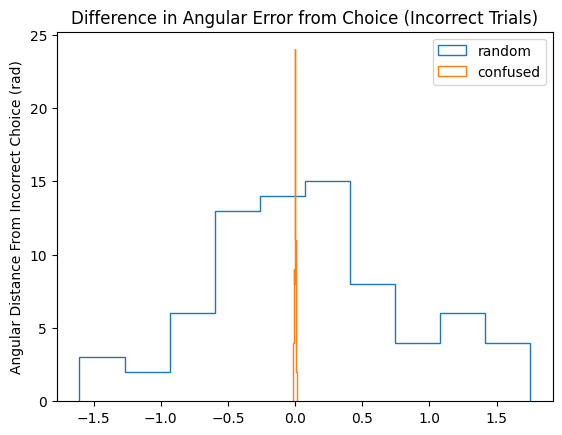

In [54]:
fig,ax = plt.subplots()
ax.hist(incorrect_df_random.precision_difference_choice, label= 'random', histtype = 'step')
ax.hist(incorrect_df_confused.precision_difference_choice,label= 'confused', histtype = 'step')
plt.legend()
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Angular Error from Choice (Incorrect Trials)')